# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

## Project Overview:
The project entails analyzing demographics data for customers of a mail-order sales company in Germany and comparing it with demographics information for the general population. The aim is to utilize unsupervised learning techniques for customer segmentation, identifying segments that best represent the core customer base of the company. Subsequently, this segmentation model will be applied to a third dataset containing demographics information for targets of a marketing campaign for the company. The goal is to predict which individuals are most likely to convert into customers. The datasets used are provided by Bertelsmann Arvato Analytics, offering a real-life data science task.

## Problem Statement:
The primary objective is to understand the customer base of the mail-order sales company by segmenting the population based on demographics data. This involves identifying similarities and differences between the customer demographics and the general population. Furthermore, the project aims to predict potential customers from a marketing campaign target dataset. By achieving this, the company can enhance its marketing strategies, tailor its products/services, and optimize customer acquisition efforts.

## Metrics

1. **Inertia (for Unsupervised Learning)**:
   - Inertia, also known as within-cluster sum of squares, gauges the tightness of clusters by computing the sum of squared    distances of samples to their nearest cluster center.
   - A lower inertia indicates that the clusters are more tightly packed, suggesting a better segmentation.

2. **ROC (Receiver Operating Characteristic) Curve (for Predictive Modeling)**:
   - The ROC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) across different threshold values.
   - A higher area under the ROC curve (AUC) indicates better model performance in distinguishing between positive and negative instances.

3. **AUC (Area Under the ROC Curve) (for Predictive Modeling)**:
    - AUC quantifies the overall performance of a classification model by computing the area under the ROC curve.
    - A higher AUC value signifies better discrimination ability of the model across various threshold values.

In [1]:
!pip install xgboost numpy pandas matplotlib seaborn scikit-learn kmodes xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

`Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
`Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).

In [3]:
# load in the data
#azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
#customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')
azdias = pd.read_csv('Udacity_AZDIAS_052018.csv')
customers = pd.read_csv('Udacity_CUSTOMERS_052018.csv')

C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\853190983.py:4: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  azdias = pd.read_csv('Udacity_AZDIAS_052018.csv')
C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\853190983.py:5: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  customers = pd.read_csv('Udacity_CUSTOMERS_052018.csv')


In [4]:
#azdias=azdias.drop(columns='Unnamed: 0')
#customers=customers.drop(columns='Unnamed: 0')

In [5]:
# Be sure to add in a lot more cells (both markdown and code) to document your
# approach and findings!
# Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [6]:
# Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [7]:
azdias.shape

(891221, 366)

In [8]:
customers.shape

(191652, 369)

In [9]:
azdias_columns = set(azdias.columns)
customers_columns = set(customers.columns)
customers_columns.difference(azdias_columns)

{'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}

In [10]:
azdias_columns.difference(customers_columns)

set()

it appears that customers has three more columns that we need to explore it

In [11]:
common_columns = list(customers_columns.intersection(azdias_columns))
len(common_columns)

366

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

### Reading the column values + information

In [12]:
columns_values = pd.read_excel('./DIAS Attributes - Values 2017.xlsx', header=1)
columns_info = pd.read_excel('./DIAS Information Levels - Attributes 2017.xlsx', header=1)

## Seeing how many columns have null values in common columns

In [13]:
# Calculate Number of NaNs
def calculate_num_nans(df):
    return (df.isna().sum()>0).sum()

In [14]:
print(f"The number of missing columns in azdias is {calculate_num_nans(azdias)}")
print(f"The number of missing columns in customers is {calculate_num_nans(customers)}")

The number of missing columns in azdias is 273
The number of missing columns in customers is 273


In [15]:
# Calculate Number of NaNs
def calculate_num_nans(df):
    return (df.isna().sum()>0).sum()

In [16]:
# Calculate Number of NaNs
def calculate_percentage_nans(df):
    return df.isna().mean() * 100

In [17]:
# Calculate Number of NaNs
def calculate_percentage_nans_column(df,columns):
    return df[columns].isna().mean() * 100

In [18]:
calculate_percentage_nans(azdias) 

LNR                      0.000000
AGER_TYP                 0.000000
AKT_DAT_KL               8.247000
ALTER_HH                 8.247000
ALTER_KIND1             90.904837
                          ...    
WOHNDAUER_2008           8.247000
WOHNLAGE                10.451729
ZABEOTYP                 0.000000
ANREDE_KZ                0.000000
ALTERSKATEGORIE_GROB     0.000000
Length: 366, dtype: float64

lets pick a threshold of 50%, values with more than this missing, we will look into them to see if they are worth dropping or not

In [19]:
threshold = 50
columns_missing_threshold = []
for column in common_columns:
    percentage_of_nulls = math.floor(azdias[column].isnull().mean() * 100)
    if percentage_of_nulls >threshold:
        print(f"Column {column} has a percentage of {percentage_of_nulls}% missing values")
        columns_missing_threshold.append(column)

Column ALTER_KIND1 has a percentage of 90% missing values
Column ALTER_KIND3 has a percentage of 99% missing values
Column ALTER_KIND2 has a percentage of 96% missing values
Column ALTER_KIND4 has a percentage of 99% missing values
Column EXTSEL992 has a percentage of 73% missing values
Column KK_KUNDENTYP has a percentage of 65% missing values


In [20]:
columns_missing_threshold

['ALTER_KIND1',
 'ALTER_KIND3',
 'ALTER_KIND2',
 'ALTER_KIND4',
 'EXTSEL992',
 'KK_KUNDENTYP']

In [21]:
columns_bigger_than_threshold = columns_info[columns_info['Attribute'].isin(columns_missing_threshold)]
len(columns_bigger_than_threshold)

0

it looks like they do not exist? we cant really read their description to see if we should drop them or not. Moreover, since it has no description we can drop them.

In [22]:
try:
    azdias.drop(columns=columns_missing_threshold,inplace=True)
    customers.drop(columns=columns_missing_threshold,inplace=True) 
except e:
    print(e)

In [23]:
azdias_columns = set(azdias.columns)
customers_columns = set(customers.columns)
common_columns = list(customers_columns.intersection(azdias_columns))
len(common_columns)

360

Nice, the 6 columns are removed. I wonder how many columns that don't have descriptions on them? 

In [24]:
columns_with_description = set(columns_info['Attribute'].unique())
len(columns_with_description)

313

In [25]:
common_columns_with_description = set(common_columns).intersection(columns_with_description)
len(common_columns_with_description)

264

In [26]:
len(common_columns) - len(common_columns_with_description)

96

We have 102 columns that have no description, if we wanted to do a customer segmentation, we wouldn't really know much about those columns since they have no description

## Imputing Data

In [27]:
print(f"The number of missing columns in azdias is {calculate_num_nans(azdias)}")
print(f"The number of missing columns in customers is {calculate_num_nans(customers)}")

The number of missing columns in azdias is 267
The number of missing columns in customers is 267


In [28]:
azdias.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 360 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    LNR                          int64  
 1    AGER_TYP                     int64  
 2    AKT_DAT_KL                   float64
 3    ALTER_HH                     float64
 4    ALTERSKATEGORIE_FEIN         float64
 5    ANZ_HAUSHALTE_AKTIV          float64
 6    ANZ_HH_TITEL                 float64
 7    ANZ_KINDER                   float64
 8    ANZ_PERSONEN                 float64
 9    ANZ_STATISTISCHE_HAUSHALTE   float64
 10   ANZ_TITEL                    float64
 11   ARBEIT                       float64
 12   BALLRAUM                     float64
 13   CAMEO_DEU_2015               object 
 14   CAMEO_DEUG_2015              object 
 15   CAMEO_INTL_2015              object 
 16   CJT_GESAMTTYP                float64
 17   CJT_KATALOGNUTZER            float64
 18   CJT_TYP_1             

In [29]:
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 363 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    LNR                          int64  
 1    AGER_TYP                     int64  
 2    AKT_DAT_KL                   float64
 3    ALTER_HH                     float64
 4    ALTERSKATEGORIE_FEIN         float64
 5    ANZ_HAUSHALTE_AKTIV          float64
 6    ANZ_HH_TITEL                 float64
 7    ANZ_KINDER                   float64
 8    ANZ_PERSONEN                 float64
 9    ANZ_STATISTISCHE_HAUSHALTE   float64
 10   ANZ_TITEL                    float64
 11   ARBEIT                       float64
 12   BALLRAUM                     float64
 13   CAMEO_DEU_2015               object 
 14   CAMEO_DEUG_2015              object 
 15   CAMEO_INTL_2015              object 
 16   CJT_GESAMTTYP                float64
 17   CJT_KATALOGNUTZER            float64
 18   CJT_TYP_1             

In [30]:
azdias_df = azdias[common_columns_with_description]
customers_df = customers[common_columns_with_description]

C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\3733404397.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  azdias_df = azdias[common_columns_with_description]
C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\3733404397.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  customers_df = customers[common_columns_with_description]


In [31]:
continuous_columns = ['GEBURTSJAHR', 'KBA13_ANZAHL_PKW','MIN_GEBAEUDEJAHR','ANZ_HAUSHALTE_AKTIV','ANZ_HH_TITEL','ANZ_PERSONEN','ANZ_TITEL']

In [32]:
# Impute missing values in azdias_df
for col in continuous_columns:
    azdias_df[col].fillna(azdias_df[col].mean(), inplace=True)

# Impute missing values in customers_df
for col in continuous_columns:
    customers_df[col].fillna(customers_df[col].mean(), inplace=True)

C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\2639197045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdias_df[col].fillna(azdias_df[col].mean(), inplace=True)
C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\2639197045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df[col].fillna(customers_df[col].mean(), inplace=True)


In [33]:
binary_columns = []
categorical_columns = []

for column in azdias_df.columns:
    # Check if the column has only two unique values and is not already numeric
    if azdias_df[column].nunique() == 2:
        binary_columns.append(column)
    # Check if the column has more than two unique values and is not already numeric
    elif azdias_df[column].nunique() > 2:
        categorical_columns.append(column)

print("Binary columns:")
print(binary_columns)
print("\nCategorical columns:")
print(categorical_columns)

Binary columns:
['OST_WEST_KZ', 'GREEN_AVANTGARDE', 'ANREDE_KZ']

Categorical columns:
['KBA13_KW_50', 'WOHNLAGE', 'KBA13_HALTER_25', 'KBA13_CCM_1800', 'KBA13_ALTERHALTER_60', 'KBA05_HERST2', 'KBA13_KW_120', 'KBA13_MAZDA', 'D19_VERSAND_OFFLINE_DATUM', 'PLZ8_BAUMAX', 'GEBAEUDETYP', 'KBA05_KRSAQUOT', 'FINANZTYP', 'KBA13_SEG_KLEINST', 'KBA13_BJ_2009', 'KBA13_BJ_1999', 'KBA05_MOD4', 'D19_VERSI_ONLINE_DATUM', 'EWDICHTE', 'ALTERSKATEGORIE_GROB', 'SEMIO_KAEM', 'KBA13_HALTER_45', 'KBA05_AUTOQUOT', 'KBA05_MOD2', 'KBA05_SEG1', 'KBA05_MOTOR', 'KBA13_VORB_0', 'KBA13_KRSHERST_AUDI_VW', 'FINANZ_ANLEGER', 'KBA13_VW', 'KBA13_HERST_ASIEN', 'KBA13_NISSAN', 'KBA05_SEG6', 'GEBAEUDETYP_RASTER', 'LP_FAMILIE_GROB', 'KBA05_HERST5', 'KBA13_SEG_MINIVANS', 'KBA05_SEG9', 'KBA05_ZUL1', 'KBA05_VORB1', 'KBA05_KRSVAN', 'KBA05_CCM2', 'HH_EINKOMMEN_SCORE', 'KBA13_SEG_SONSTIGE', 'KBA13_CCM_2500', 'KBA13_KRSSEG_VAN', 'KBA13_KW_80', 'KBA05_ALTER3', 'KBA05_VORB2', 'KBA05_MOD3', 'KBA13_SEG_VAN', 'KBA05_HERST4', 'VERS_TYP', 

Don't get fooled by this many categorical data, most of them are already encoded, we need to find columns that are not encoded

In [34]:
import pandas as pd
# Loop through each column and check for non-numeric values
for column in azdias_df.columns:
    if azdias_df[column].dtype == 'object':
        non_numeric_values = azdias_df[column].loc[azdias_df[column].str.contains(r'[^\d.]+', na=False)]
        if not non_numeric_values.empty:
            print(f"Column '{column}' contains non-numeric values: {non_numeric_values.unique()}")



Column 'OST_WEST_KZ' contains non-numeric values: ['W' 'O']
Column 'CAMEO_DEU_2015' contains non-numeric values: ['8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C'
 '9C' '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F'
 '5F' '1C' 'XX']
Column 'CAMEO_DEUG_2015' contains non-numeric values: ['X']


- the column `CAMEO_DEUG_2015` is single value, we can drop it

In [35]:
azdias_df.drop(columns=['CAMEO_DEUG_2015'],inplace=True)
customers_df.drop(columns=['CAMEO_DEUG_2015'],inplace=True)

C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\2311329266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdias_df.drop(columns=['CAMEO_DEUG_2015'],inplace=True)
C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\2311329266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df.drop(columns=['CAMEO_DEUG_2015'],inplace=True)


In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
azdias_df['OST_WEST_KZ'] = label_encoder.fit_transform(azdias_df['OST_WEST_KZ'])
customers_df['OST_WEST_KZ'] = label_encoder.fit_transform(customers_df['OST_WEST_KZ'])

C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\2927140678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdias_df['OST_WEST_KZ'] = label_encoder.fit_transform(azdias_df['OST_WEST_KZ'])
C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\2927140678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['OST_WEST_KZ'] = label_encoder.fit_transform(customers_df['OST_WEST_KZ'])


In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
azdias_df['CAMEO_DEU_2015'] = label_encoder.fit_transform(azdias_df['CAMEO_DEU_2015'])
customers_df['CAMEO_DEU_2015'] = label_encoder.fit_transform(customers_df['CAMEO_DEU_2015'])

C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\984949902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdias_df['CAMEO_DEU_2015'] = label_encoder.fit_transform(azdias_df['CAMEO_DEU_2015'])
C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\984949902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df['CAMEO_DEU_2015'] = label_encoder.fit_transform(customers_df['CAMEO_DEU_2015'])


In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Assuming your DataFrame is named azdias
# Replace 'azdias' with your DataFrame name

# Step 1: Impute missing values in binary columns with the most frequent value
binary_imputer = SimpleImputer(strategy='most_frequent')
azdias_df[binary_columns] = binary_imputer.fit_transform(azdias_df[binary_columns])
customers_df[binary_columns] = binary_imputer.fit_transform(customers_df[binary_columns])

C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\2316251955.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azdias_df[binary_columns] = binary_imputer.fit_transform(azdias_df[binary_columns])
C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\2316251955.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df[binary_columns] = binary_imputer.fit_transform(customers_df[binary_columns])


## Impute missing data using backward + forwardfill for azdias, and for customer forward only

In [39]:
azdias_df = azdias_df.fillna(method='bfill')
calculate_num_nans(azdias_df)

4

It looks like there still 9 columns that have missing values, lets impute them with a forward fill

In [40]:
azdias_df = azdias_df.fillna(method='ffill')
calculate_num_nans(azdias_df)

0

In [41]:
customers_df = customers_df.fillna(method='ffill')
calculate_num_nans(customers_df)

0

Cool, now we have no missing values

## Exploratory data analysis

In [42]:
# Define the mapping dictionary
mapping_dict = {
    -1: 'unknown',
     0: 'unknown',
     1: '<30 years',
     2: '30-45 years',
     3: '46-60 years',
     4: '>60 years',
     9: 'uniformly distributed'
}

# Map the values in the column to their descriptions
azdias_df['ALTERSKATEGORIE_GROB_mapped'] = azdias_df['ALTERSKATEGORIE_GROB'].map(mapping_dict)
customers_df['ALTERSKATEGORIE_GROB_mapped'] = customers_df['ALTERSKATEGORIE_GROB'].map(mapping_dict)

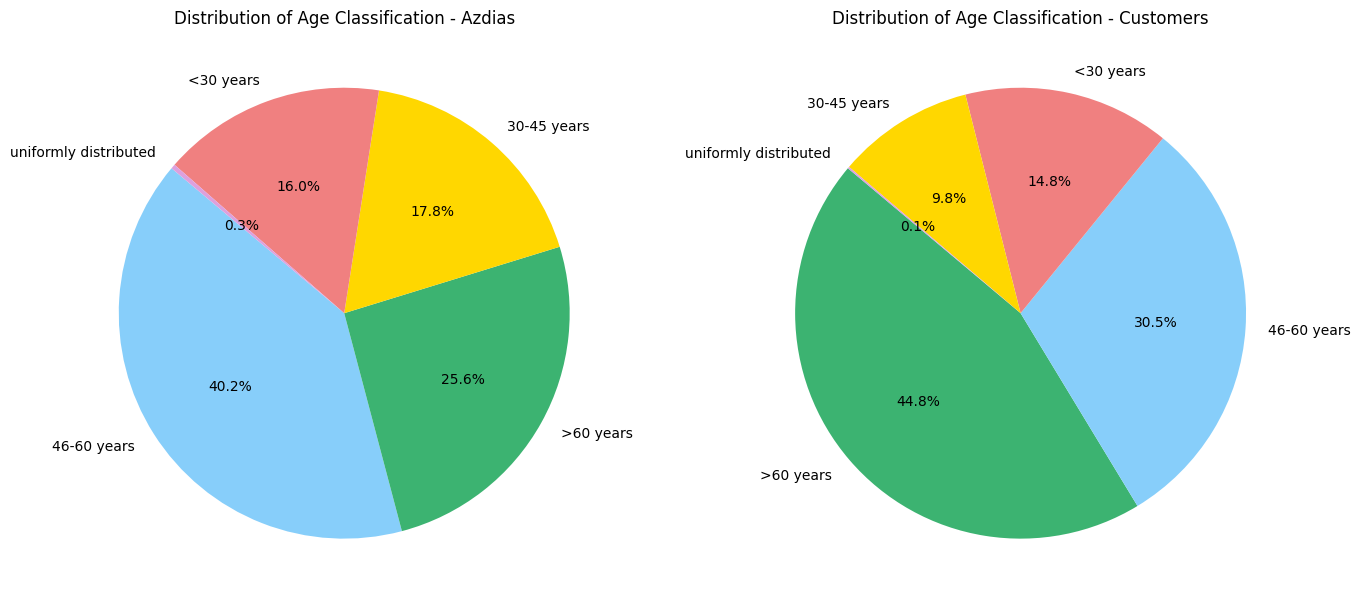

In [43]:
# Count the occurrences of each category for azdias
value_counts_azdias = azdias_df['ALTERSKATEGORIE_GROB_mapped'].value_counts()

# Count the occurrences of each category for customers
value_counts_customers = customers_df['ALTERSKATEGORIE_GROB_mapped'].value_counts()

# Define a color dictionary for each category
color_dict = {
    '<30 years': 'lightcoral',
    '30-45 years': 'gold',
    '46-60 years': 'lightskyblue',
    '>60 years': 'mediumseagreen',
    'uniformly distributed': 'plum'
}

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot for azdias
ax1.pie(value_counts_azdias, labels=value_counts_azdias.index, autopct='%1.1f%%', startangle=140, colors=[color_dict[x] for x in value_counts_azdias.index])
ax1.set_title('Distribution of Age Classification - Azdias')

# Plot for customers
ax2.pie(value_counts_customers, labels=value_counts_customers.index, autopct='%1.1f%%', startangle=140, colors=[color_dict[x] for x in value_counts_customers.index])
ax2.set_title('Distribution of Age Classification - Customers')

plt.show()

| Age Group            | Azdias Count | Customers Count | 
|----------------------|--------------|-----------------|
| <30 years            | 142,887      | 28,387  |
| 30-45 years          | 158,410      |18,827   | 
| 46-60 years          | 358,533      |58,364   |
| >60 years            | 228,510      |85,834   |
| Uniformly Distributed| 2,881        | 240     |


Comparing Arvato's customers to the population, it seems that most of Arvato's customers are older than 60 years old then followed by people between 46-60 years old. then people older than 30 years old. Compared to the population, having a higher percentage of people aged between 46-60 years then followed by people older than 60 years old then people age is between 30-45 years. 

In [44]:
azdias_df.drop(columns=['ALTERSKATEGORIE_GROB_mapped'],inplace=True)
customers_df.drop(columns=['ALTERSKATEGORIE_GROB_mapped'],inplace=True)

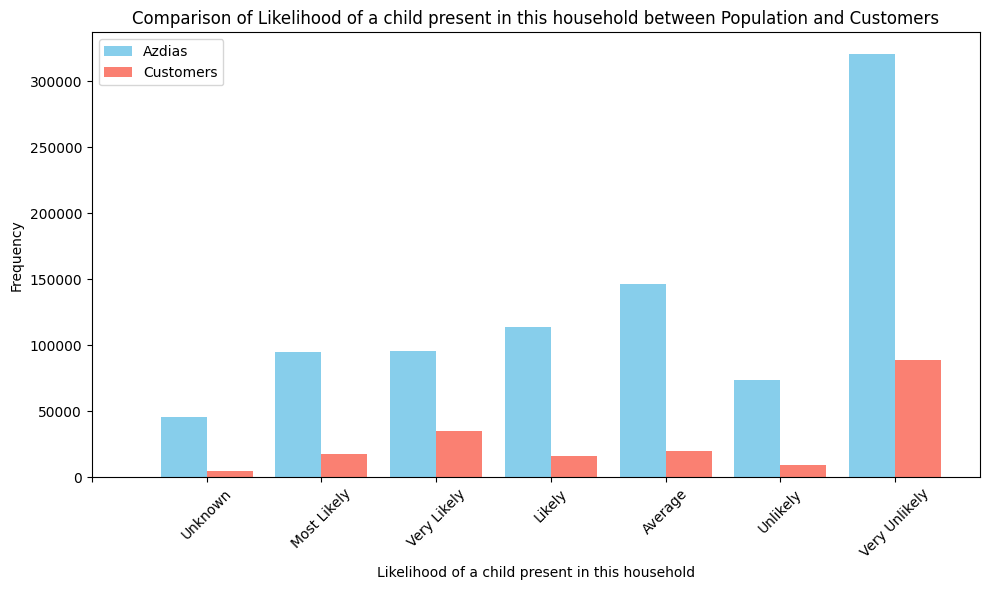

In [45]:
# Assuming azdias and customers have the same structure and column names
# You can adjust this according to your actual data
azdias_counts = azdias_df['W_KEIT_KIND_HH'].value_counts().sort_index()
customers_counts = customers_df['W_KEIT_KIND_HH'].value_counts().sort_index()

# Define colors for the bars
azdias_color = 'skyblue'  # Color for Azdias bars
customers_color = 'salmon'  # Color for Customers bars

# Plotting
plt.figure(figsize=(10, 6))

# Plot for azdias
plt.bar(azdias_counts.index - 0.2, azdias_counts.values, width=0.4, align='center', label='Azdias', color=azdias_color)

# Plot for customers
plt.bar(customers_counts.index + 0.2, customers_counts.values, width=0.4, align='center', label='Customers', color=customers_color)

plt.xlabel('Likelihood of a child present in this household')
plt.ylabel('Frequency')
plt.title('Comparison of Likelihood of a child present in this household between Population and Customers')

# Adjusting the ticks and labels
plt.xticks(range(-1, 7), ['','Unknown', 'Most Likely', 'Very Likely', 'Likely', 'Average', 'Unlikely', 'Very Unlikely'], rotation=45)

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Interesting, it seems like most german individuals are very unlikely to have a child. According to Microtrends, The current population of Germany in 2024 is 83,252,474, a 0.05% decline from 2023. this explains something right?

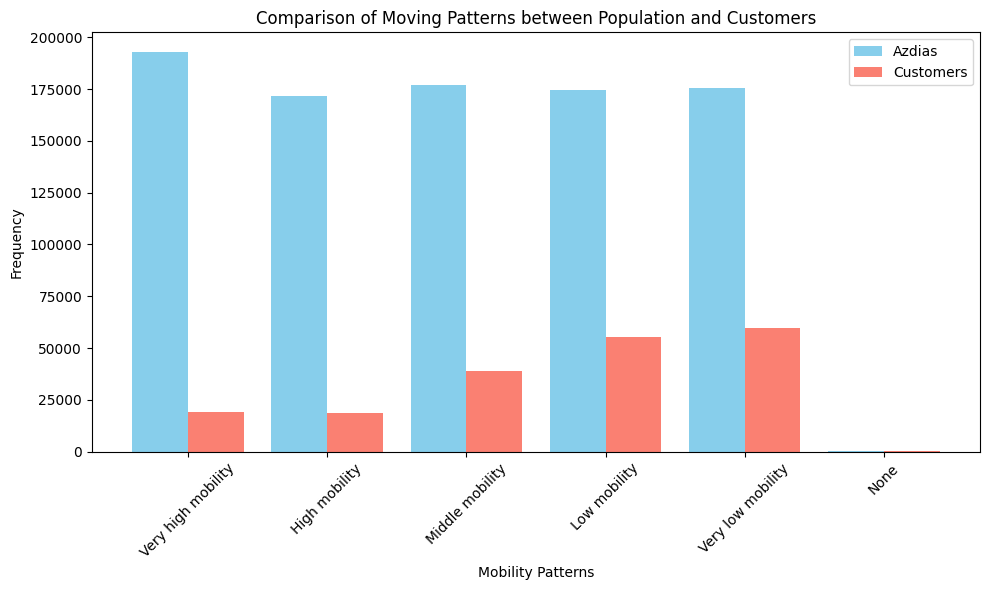

In [46]:
import matplotlib.pyplot as plt

# Calculate value counts for both datasets
azdias_counts = azdias_df['MOBI_REGIO'].value_counts().sort_index()
customers_counts = customers_df['MOBI_REGIO'].value_counts().sort_index()

# Define colors for the bars
azdias_color = 'skyblue'  # Color for Azdias bars
customers_color = 'salmon'  # Color for Customers bars

# Plotting
plt.figure(figsize=(10, 6))

# Plot for azdias
plt.bar(azdias_counts.index - 0.2, azdias_counts.values, width=0.4, align='center', label='Azdias', color=azdias_color)

# Plot for customers
plt.bar(customers_counts.index + 0.2, customers_counts.values, width=0.4, align='center', label='Customers', color=customers_color)

plt.xlabel('Mobility Patterns')
plt.ylabel('Frequency')
plt.title('Comparison of Moving Patterns between Population and Customers')

# Adjusting the ticks and labels
plt.xticks(range(1, 7), ['Very high mobility','High mobility','Middle mobility','Low mobility','Very low mobility','None'], rotation=45)

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


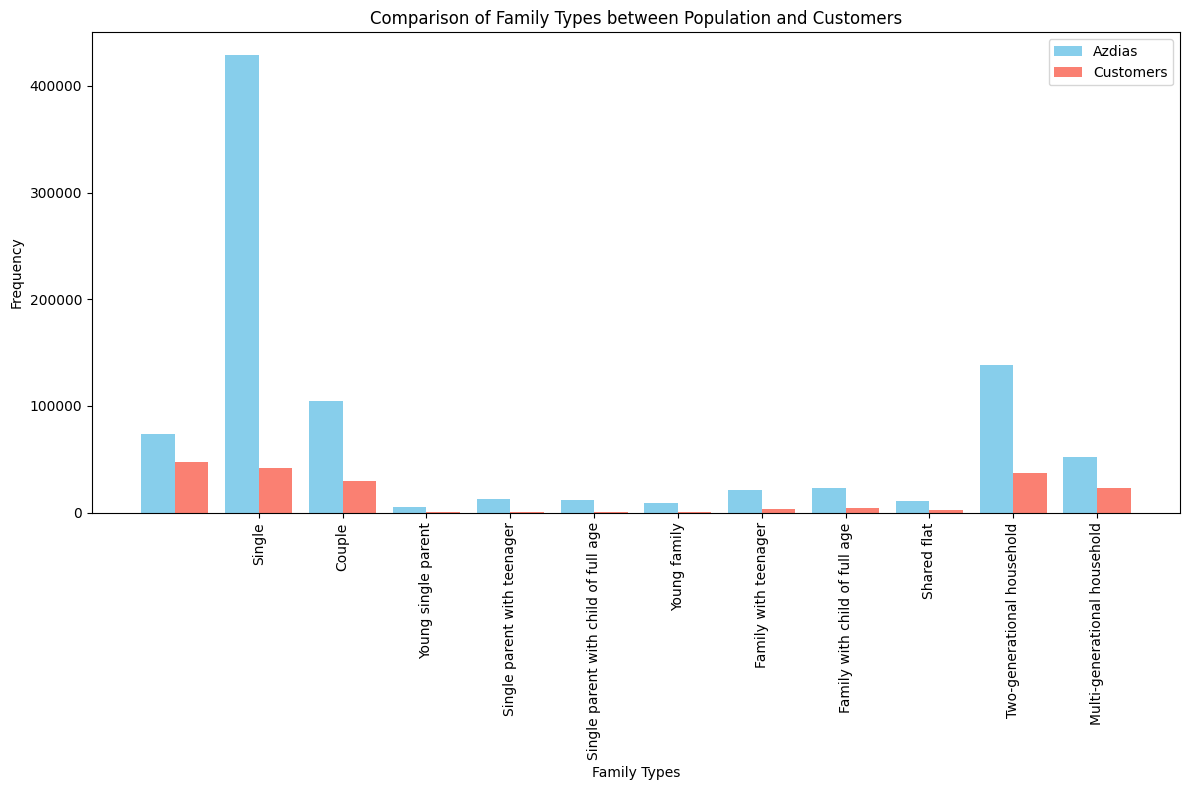

In [47]:
azdias_counts = azdias_df['LP_FAMILIE_FEIN'].value_counts().sort_index()
customers_counts = customers_df['LP_FAMILIE_FEIN'].value_counts().sort_index()
# Define colors for the bars
azdias_color = 'skyblue'  # Color for Azdias bars
customers_color = 'salmon'  # Color for Customers bars

# Plotting
plt.figure(figsize=(12, 8))

# Plot for azdias
plt.bar(azdias_counts.index - 0.2, azdias_counts.values, width=0.4, align='center', label='Azdias', color=azdias_color)

# Plot for customers
plt.bar(customers_counts.index + 0.2, customers_counts.values, width=0.4, align='center', label='Customers', color=customers_color)

plt.xlabel('Family Types')
plt.ylabel('Frequency')
plt.title('Comparison of Family Types between Population and Customers')

# Adjusting the ticks and labels
plt.xticks(range(1, 12), ['Single', 'Couple', 'Young single parent', 'Single parent with teenager', 
                          'Single parent with child of full age', 'Young family', 'Family with teenager', 
                          'Family with child of full age', 'Shared flat', 'Two-generational household', 
                          'Multi-generational household'], rotation=90)

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [48]:
azdias_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 263 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    KBA13_KW_50                  float64
 1    WOHNLAGE                     float64
 2    KBA13_HALTER_25              float64
 3    KBA13_CCM_1800               float64
 4    KBA13_ALTERHALTER_60         float64
 5    KBA05_HERST2                 float64
 6    KBA13_KW_120                 float64
 7    KBA13_MAZDA                  float64
 8    D19_VERSAND_OFFLINE_DATUM    int64  
 9    PLZ8_BAUMAX                  float64
 10   GEBAEUDETYP                  float64
 11   KBA05_KRSAQUOT               float64
 12   FINANZTYP                    int64  
 13   KBA13_SEG_KLEINST            float64
 14   KBA13_BJ_2009                float64
 15   KBA13_BJ_1999                float64
 16   KBA05_MOD4                   float64
 17   D19_VERSI_ONLINE_DATUM       int64  
 18   EWDICHTE              

In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit label encoder and transform the column
#azdias_df['CAMEO_DEU_2015'] = label_encoder.fit_transform(azdias_df['CAMEO_DEU_2015'])
#customers_df['CAMEO_DEU_2015'] = label_encoder.fit_transform(customers_df['CAMEO_DEU_2015'])
azdias_df['CAMEO_DEU_2015']

0         45
1         35
2         15
3          5
4         25
          ..
891216    30
891217    42
891218    15
891219    42
891220    25
Name: CAMEO_DEU_2015, Length: 891221, dtype: int32

## Applying PCA to reduce dimensionality of the dataframes

In [50]:
# Perform PCA on azdias_df
pca_azdias = PCA()  
data_reduced_azdias = pca_azdias.fit_transform(azdias_df)

# Perform PCA on customers_df
pca_customers = PCA()  
data_reduced_customers = pca_customers.fit_transform(customers_df)

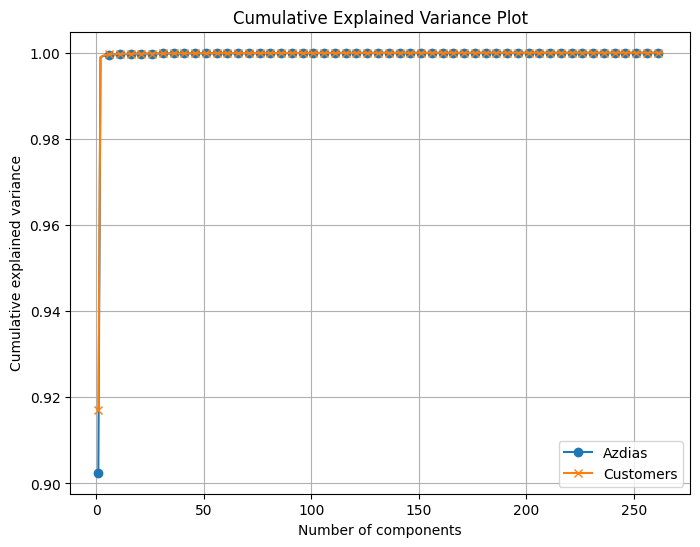

In [51]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_azdias.explained_variance_ratio_) + 1), np.cumsum(pca_azdias.explained_variance_ratio_), marker='o', markevery=5, label='Azdias')
plt.plot(range(1, len(pca_customers.explained_variance_ratio_) + 1), np.cumsum(pca_customers.explained_variance_ratio_), marker='x', markevery=5, label='Customers')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.legend()
plt.show()

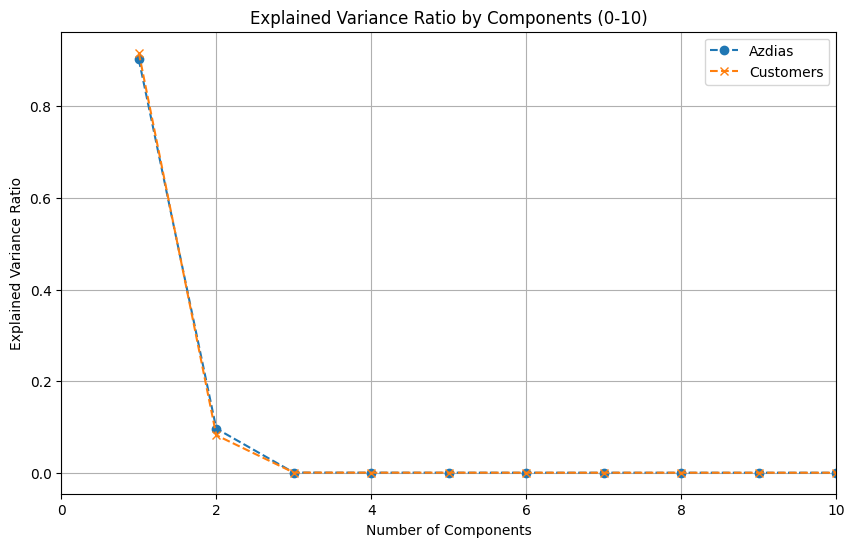

In [52]:
# Plot explained variance ratio for components 0 to 10
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), pca_azdias.explained_variance_ratio_[:10], marker='o', linestyle='--', label='Azdias')  # Focus on components 0 to 10
plt.plot(range(1, 11), pca_customers.explained_variance_ratio_[:10], marker='x', linestyle='--', label='Customers')  # Focus on components 0 to 10
plt.title('Explained Variance Ratio by Components (0-10)')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xlim(0, 10)  # Set x-axis limits to 0-10
plt.grid(True)
plt.legend()
plt.show()

In [53]:
# Calculate explained variance ratios for azdias_df
explained_variance_ratios_azdias = pca_azdias.explained_variance_ratio_

# Calculate explained variance ratios for customers_df
explained_variance_ratios_customers = pca_customers.explained_variance_ratio_

# Calculate cumulative explained variance for azdias_df
cumulative_variance_azdias = 0
n_components_azdias = 0

for i, explained_variance_ratio in enumerate(explained_variance_ratios_azdias):
    cumulative_variance_azdias += explained_variance_ratio
    n_components_azdias += 1
    print(f"Azdias: {n_components_azdias} components explain cumulative variance: {cumulative_variance_azdias}")

# Calculate cumulative explained variance for customers_df
cumulative_variance_customers = 0
n_components_customers = 0

for i, explained_variance_ratio in enumerate(explained_variance_ratios_customers):
    cumulative_variance_customers += explained_variance_ratio
    n_components_customers += 1
    print(f"Customers: {n_components_customers} components explain cumulative variance: {cumulative_variance_customers}")

Azdias: 1 components explain cumulative variance: 0.9024917124409017
Azdias: 2 components explain cumulative variance: 0.9988913349486754
Azdias: 3 components explain cumulative variance: 0.999179216684418
Azdias: 4 components explain cumulative variance: 0.9993403195969113
Azdias: 5 components explain cumulative variance: 0.9994573116619746
Azdias: 6 components explain cumulative variance: 0.9995158070911123
Azdias: 7 components explain cumulative variance: 0.999564411056107
Azdias: 8 components explain cumulative variance: 0.9996051569717019
Azdias: 9 components explain cumulative variance: 0.9996350325091282
Azdias: 10 components explain cumulative variance: 0.9996572831352156
Azdias: 11 components explain cumulative variance: 0.9996746530002001
Azdias: 12 components explain cumulative variance: 0.9996911828517404
Azdias: 13 components explain cumulative variance: 0.9997037932441316
Azdias: 14 components explain cumulative variance: 0.999714915582653
Azdias: 15 components explain cu

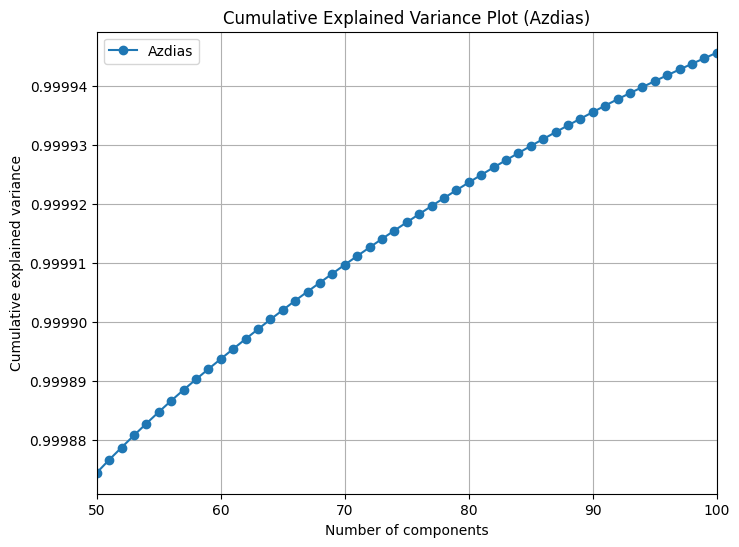

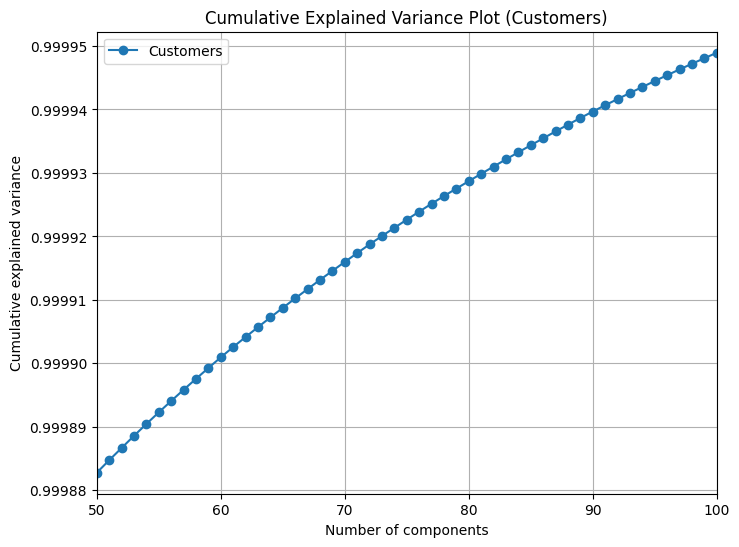

In [54]:
# Assuming pca.explained_variance_ratio_ contains the data for azdias_df
x_values_azdias = range(1, len(pca_azdias.explained_variance_ratio_) + 1)
y_values_azdias = np.cumsum(pca_azdias.explained_variance_ratio_)

# Filter x and y values within the specified range for azdias_df
x_values_filtered_azdias = [x for x in x_values_azdias if 50 <= x <= 100]
y_values_filtered_azdias = y_values_azdias[49:100]

# Plot cumulative explained variance for azdias_df
plt.figure(figsize=(8, 6))
plt.plot(x_values_filtered_azdias, y_values_filtered_azdias, marker='o', label='Azdias')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance Plot (Azdias)')
plt.grid(True)
plt.xlim(50, 100)  # Set x-axis limits from 50 to 100
plt.legend()
plt.show()

# Assuming pca.explained_variance_ratio_ contains the data for customers_df
x_values_customers = range(1, len(pca_customers.explained_variance_ratio_) + 1)
y_values_customers = np.cumsum(pca_customers.explained_variance_ratio_)

# Filter x and y values within the specified range for customers_df
x_values_filtered_customers = [x for x in x_values_customers if 50 <= x <= 100]
y_values_filtered_customers = y_values_customers[49:100]

# Plot cumulative explained variance for customers_df
plt.figure(figsize=(8, 6))
plt.plot(x_values_filtered_customers, y_values_filtered_customers, marker='o', label='Customers')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance Plot (Customers)')
plt.grid(True)
plt.xlim(50, 100)  # Set x-axis limits from 50 to 100
plt.legend()
plt.show()

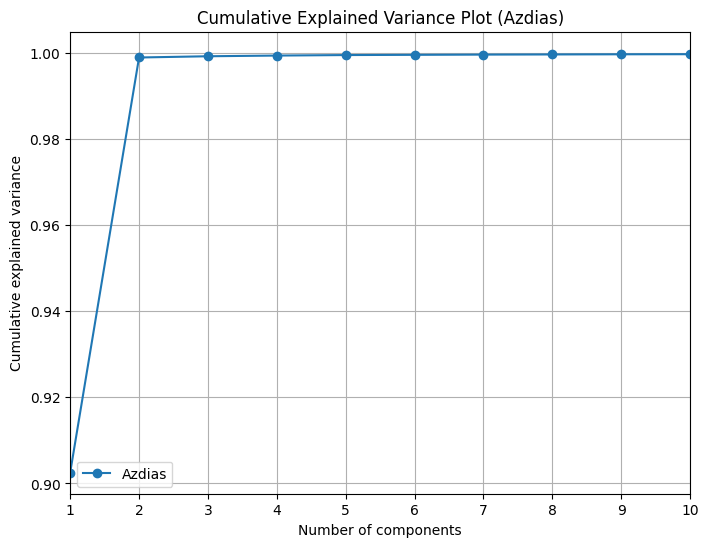

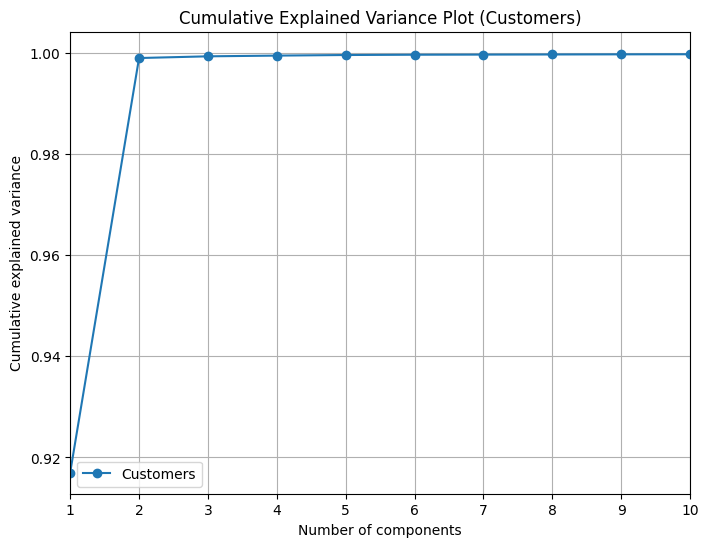

In [55]:
# Assuming pca.explained_variance_ratio_ contains the data for azdias_df
x_values_azdias = range(1, len(pca_azdias.explained_variance_ratio_) + 1)
y_values_azdias = np.cumsum(pca_azdias.explained_variance_ratio_)

# Plot cumulative explained variance for azdias_df
plt.figure(figsize=(8, 6))
plt.plot(x_values_azdias, y_values_azdias, marker='o', label='Azdias')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance Plot (Azdias)')
plt.grid(True)
plt.xlim(1, 10)  # Set x-axis limits from 1 to 10
plt.legend()
plt.show()

# Assuming pca.explained_variance_ratio_ contains the data for customers_df
x_values_customers = range(1, len(pca_customers.explained_variance_ratio_) + 1)
y_values_customers = np.cumsum(pca_customers.explained_variance_ratio_)

# Plot cumulative explained variance for customers_df
plt.figure(figsize=(8, 6))
plt.plot(x_values_customers, y_values_customers, marker='o', label='Customers')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance Plot (Customers)')
plt.grid(True)
plt.xlim(1, 10)  # Set x-axis limits from 1 to 10
plt.legend()
plt.show()

It looks like this curve gets stepper when it gets to 2 components

### PCA result interpretation

- Visual Inspection: Examining the EVR plot, we observe a clear "elbow" around the 3rd component. This signifies a significant flattening of the curve, indicating that adding further components will provide diminishing returns in terms of explained variance.

- Interpretability Advantage: Interpreting 3 PCs is considerably easier than higher dimensions, facilitating insights into the underlying data structure and facilitating potential correlation with specific features.

## Clustering

In [56]:
# Perform PCA on azdias_df
pca_azdias = PCA(n_components=3)  
data_reduced_azdias = pca_azdias.fit_transform(azdias_df)

# Perform PCA on customers_df
pca_customers = PCA(n_components=3)  
data_reduced_customers = pca_customers.fit_transform(customers_df)

c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


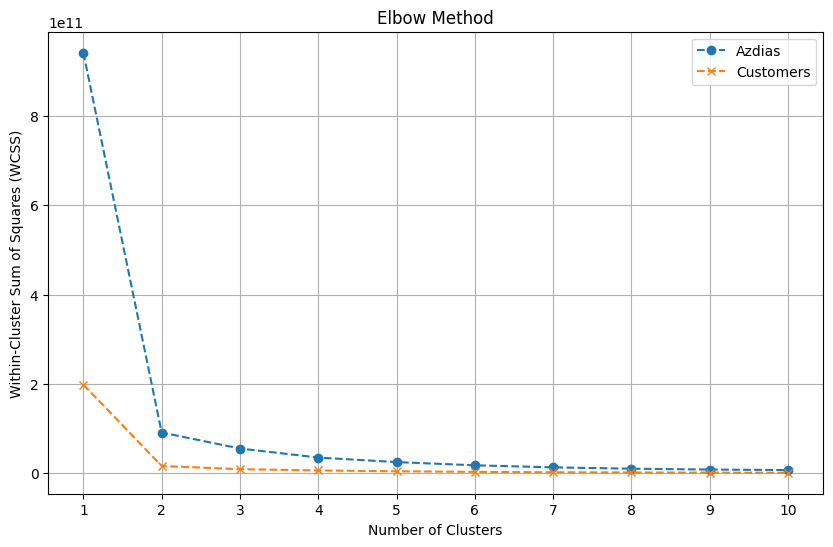

In [57]:
# Initialize empty lists to store within-cluster sum of squares (inertia)
wcss_azdias = []
wcss_customers = []
# Iterate over a range of cluster numbers and compute WCSS for azdias_df
for i in range(1, 11):
    kmeans_azdias = KMeans(n_clusters=i, random_state=42)
    kmeans_azdias.fit(data_reduced_azdias)
    wcss_azdias.append(kmeans_azdias.inertia_)

# Iterate over a range of cluster numbers and compute WCSS for customers_df
for i in range(1, 11):
    kmeans_customers = KMeans(n_clusters=i, random_state=42)
    kmeans_customers.fit(data_reduced_customers)
    wcss_customers.append(kmeans_customers.inertia_)

# Plot the elbow method for both datasets
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_azdias, marker='o', linestyle='--', label='Azdias')
plt.plot(range(1, 11), wcss_customers, marker='x', linestyle='--', label='Customers')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

We can stop at 3 clusters, since it almost flatten for azdias and it flattens after 2 cluster for customers, so 3 clusters would be good

In [58]:
# Fit KMeans with the chosen number of clusters for azdias_df
kmeans_azdias = KMeans(n_clusters=3, random_state=42)
kmeans_azdias.fit(data_reduced_azdias)

# Fit KMeans with the chosen number of clusters for customers_df
kmeans_customers = KMeans(n_clusters=3, random_state=42)
kmeans_customers.fit(data_reduced_customers)

c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

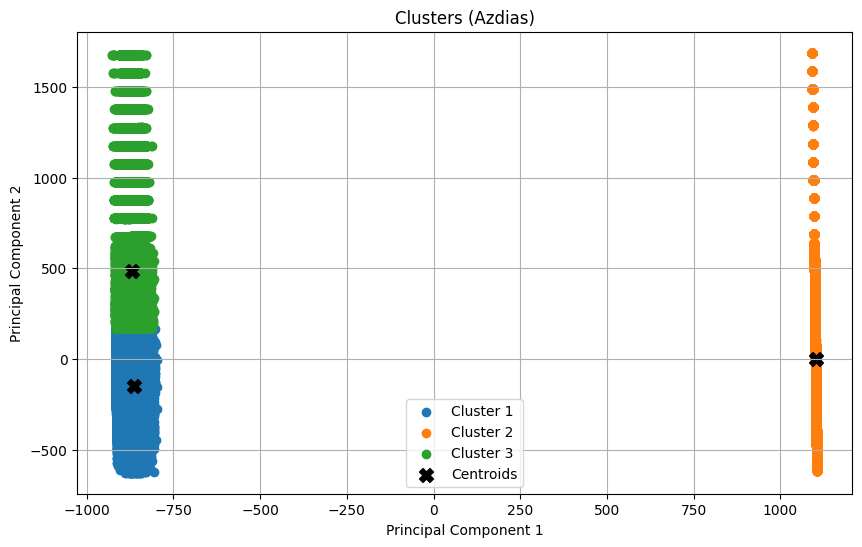

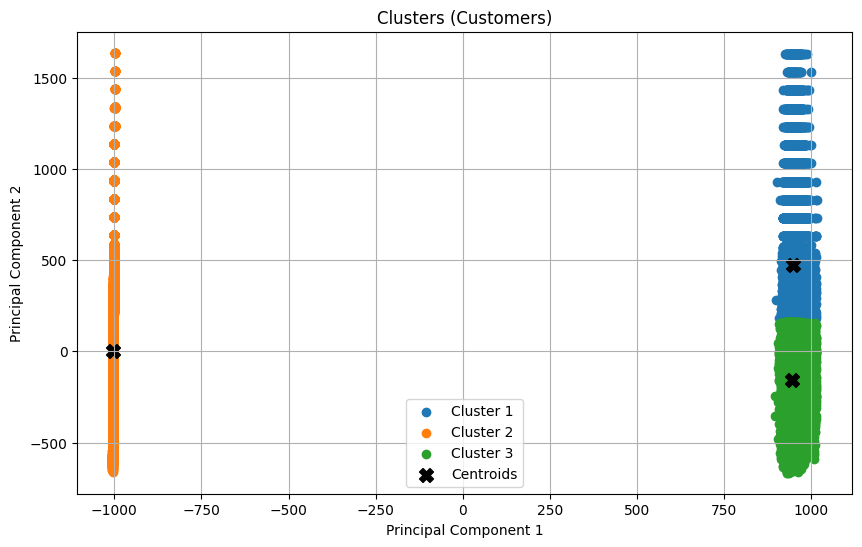

In [59]:
# Get cluster labels for azdias_df
cluster_labels_azdias = kmeans_azdias.labels_

# Get cluster labels for customers_df
cluster_labels_customers = kmeans_customers.labels_

# Plot clusters for azdias_df
plt.figure(figsize=(10, 6))
for cluster_label in range(3):
    plt.scatter(data_reduced_azdias[cluster_labels_azdias == cluster_label, 0], 
                data_reduced_azdias[cluster_labels_azdias == cluster_label, 1], 
                label=f'Cluster {cluster_label + 1}')
plt.scatter(kmeans_azdias.cluster_centers_[:, 0], kmeans_azdias.cluster_centers_[:, 1], 
            s=100, c='black', marker='X', label='Centroids')
plt.title('Clusters (Azdias)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Plot clusters for customers_df
plt.figure(figsize=(10, 6))
for cluster_label in range(3):
    plt.scatter(data_reduced_customers[cluster_labels_customers == cluster_label, 0], 
                data_reduced_customers[cluster_labels_customers == cluster_label, 1], 
                label=f'Cluster {cluster_label + 1}')
plt.scatter(kmeans_customers.cluster_centers_[:, 0], kmeans_customers.cluster_centers_[:, 1], 
            s=100, c='black', marker='X', label='Centroids')
plt.title('Clusters (Customers)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

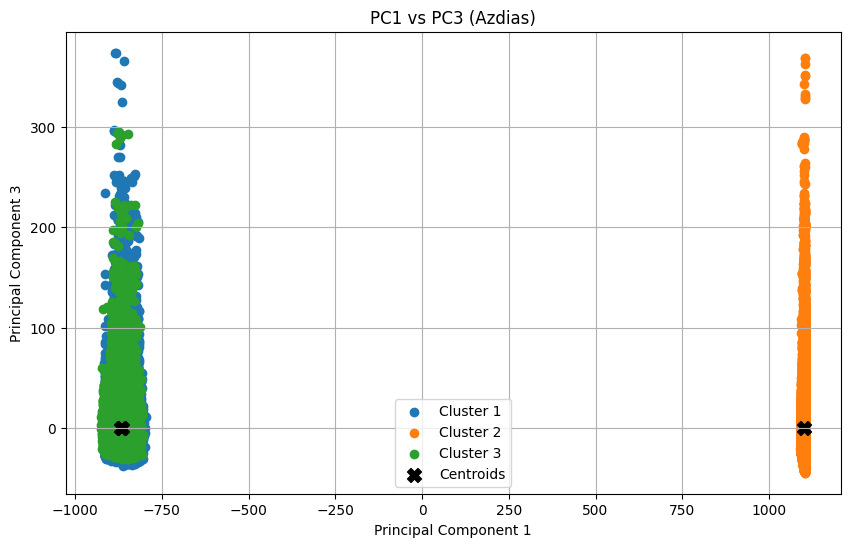

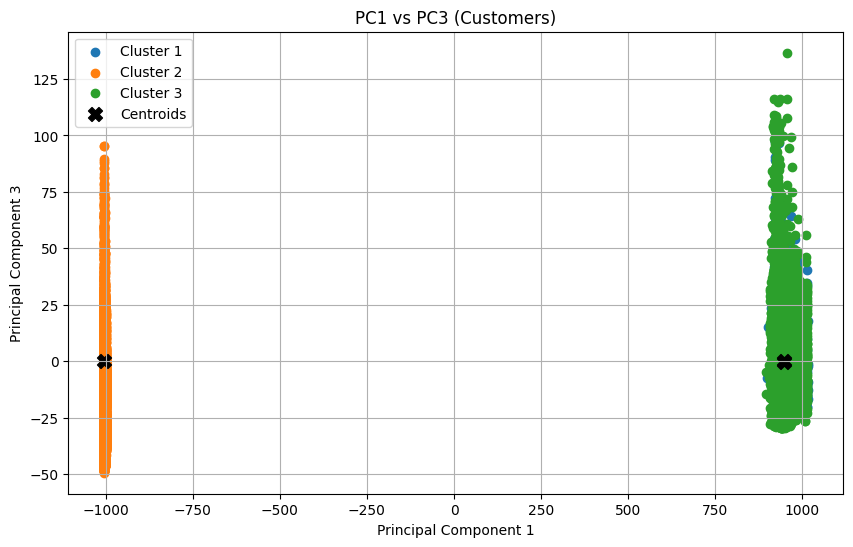

In [60]:
# Plot PC1 vs PC3 for azdias_df
plt.figure(figsize=(10, 6))
for cluster_label in range(3):  # Adjusted to iterate over 3 clusters
    plt.scatter(data_reduced_azdias[cluster_labels_azdias == cluster_label, 0], 
                data_reduced_azdias[cluster_labels_azdias == cluster_label, 2], 
                label=f'Cluster {cluster_label + 1}')

plt.scatter(kmeans_azdias.cluster_centers_[:, 0], kmeans_azdias.cluster_centers_[:, 2], 
            s=100, c='black', marker='X', label='Centroids')

plt.title('PC1 vs PC3 (Azdias)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend()
plt.grid(True)
plt.show()

# Plot PC1 vs PC3 for customers_df
plt.figure(figsize=(10, 6))
for cluster_label in range(3):  # Adjusted to iterate over 3 clusters
    plt.scatter(data_reduced_customers[cluster_labels_customers == cluster_label, 0], 
                data_reduced_customers[cluster_labels_customers == cluster_label, 2], 
                label=f'Cluster {cluster_label + 1}')

plt.scatter(kmeans_customers.cluster_centers_[:, 0], kmeans_customers.cluster_centers_[:, 2], 
            s=100, c='black', marker='X', label='Centroids')

plt.title('PC1 vs PC3 (Customers)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend()
plt.grid(True)
plt.show()

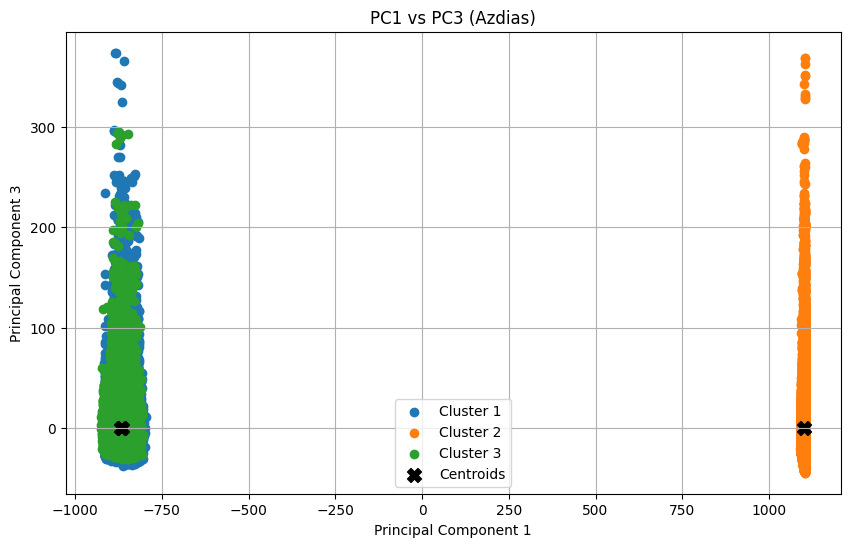

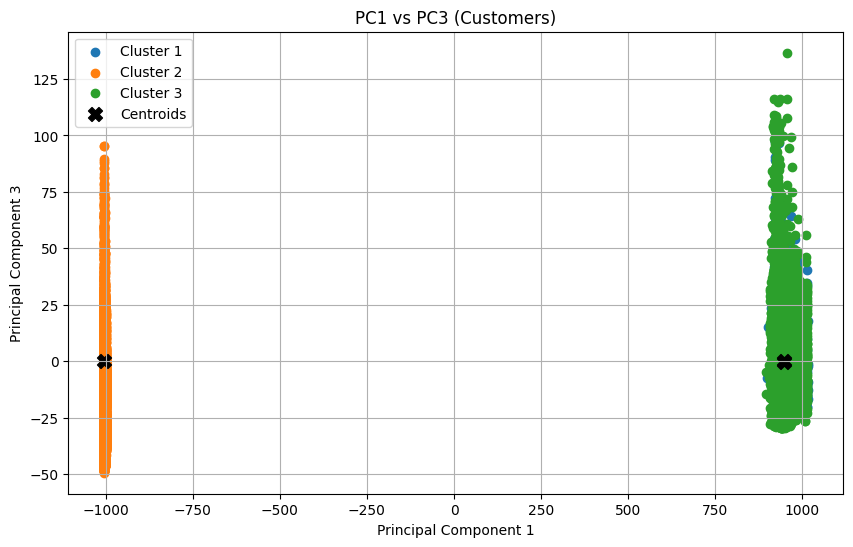

In [61]:
# Plot PC1 vs PC3 for azdias_df
plt.figure(figsize=(10, 6))
for cluster_label in range(3):  # Adjusted to iterate over 3 clusters
    plt.scatter(data_reduced_azdias[cluster_labels_azdias == cluster_label, 0], 
                data_reduced_azdias[cluster_labels_azdias == cluster_label, 2], 
                label=f'Cluster {cluster_label + 1}')

plt.scatter(kmeans_azdias.cluster_centers_[:, 0], kmeans_azdias.cluster_centers_[:, 2], 
            s=100, c='black', marker='X', label='Centroids')

plt.title('PC1 vs PC3 (Azdias)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend()
plt.grid(True)
plt.show()

# Plot PC1 vs PC3 for customers_df
plt.figure(figsize=(10, 6))
for cluster_label in range(3):  # Adjusted to iterate over 3 clusters
    plt.scatter(data_reduced_customers[cluster_labels_customers == cluster_label, 0], 
                data_reduced_customers[cluster_labels_customers == cluster_label, 2], 
                label=f'Cluster {cluster_label + 1}')

plt.scatter(kmeans_customers.cluster_centers_[:, 0], kmeans_customers.cluster_centers_[:, 2], 
            s=100, c='black', marker='X', label='Centroids')

plt.title('PC1 vs PC3 (Customers)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend()
plt.grid(True)
plt.show()


### Lets see which features were the highest influence on the PCA

In [62]:
# Get the explained variance ratios for each principal component
explained_variance_ratio_azdias = pca_azdias.explained_variance_ratio_
explained_variance_ratio_customers = pca_customers.explained_variance_ratio_

# Get the loadings (coefficients) for each principal component
loadings_azdias = pca_azdias.components_
loadings_customers = pca_customers.components_

# Determine the number of top features you want to extract
num_top_features = 5  # Adjust as needed

# Extract the top features for each principal component
top_features_azdias = []
top_features_customers = []

for component in loadings_azdias:
    top_indices = np.abs(component).argsort()[::-1][:num_top_features]
    top_features_azdias.append(azdias_df.columns[top_indices])

for component in loadings_customers:
    top_indices = np.abs(component).argsort()[::-1][:num_top_features]
    top_features_customers.append(customers_df.columns[top_indices])

# Display the top features for each principal component
for i, features in enumerate(top_features_azdias):
    print(f"Top features for Principal Component {i+1} (Azdias): {', '.join(features)}")

for i, features in enumerate(top_features_customers):
    print(f"Top features for Principal Component {i+1} (Customers): {', '.join(features)}")


Top features for Principal Component 1 (Azdias): GEBURTSJAHR, KBA13_ANZAHL_PKW, ALTER_HH, CAMEO_DEU_2015, LP_LEBENSPHASE_FEIN
Top features for Principal Component 2 (Azdias): KBA13_ANZAHL_PKW, CAMEO_DEU_2015, GEBURTSJAHR, ANZ_HAUSHALTE_AKTIV, LP_LEBENSPHASE_FEIN
Top features for Principal Component 3 (Azdias): ANZ_HAUSHALTE_AKTIV, CAMEO_DEU_2015, LP_LEBENSPHASE_FEIN, LP_LEBENSPHASE_GROB, LP_FAMILIE_FEIN
Top features for Principal Component 1 (Customers): GEBURTSJAHR, CAMEO_DEU_2015, LP_LEBENSPHASE_FEIN, KBA13_ANZAHL_PKW, PRAEGENDE_JUGENDJAHRE
Top features for Principal Component 2 (Customers): KBA13_ANZAHL_PKW, CAMEO_DEU_2015, GEBURTSJAHR, ANZ_HAUSHALTE_AKTIV, PLZ8_GBZ
Top features for Principal Component 3 (Customers): LP_LEBENSPHASE_FEIN, CAMEO_DEU_2015, ANZ_HAUSHALTE_AKTIV, LP_LEBENSPHASE_GROB, LP_FAMILIE_FEIN


In [63]:
customers_df['LNR'] = customers['LNR']
azdias_df['LNR'] = azdias['LNR']

In [64]:
# Combine all the top features into a single list
all_top_features = []

for features in top_features_azdias:
    all_top_features.extend(features)

for features in top_features_customers:
    all_top_features.extend(features)

# Convert the list to a set to remove duplicates and then back to a list
unique_top_features = list(set(all_top_features))

print("Unique top features from both Azdias and Customers datasets:")
print(unique_top_features)


Unique top features from both Azdias and Customers datasets:
['ALTER_HH', 'LP_FAMILIE_FEIN', 'PRAEGENDE_JUGENDJAHRE', 'ANZ_HAUSHALTE_AKTIV', 'LP_LEBENSPHASE_FEIN', 'KBA13_ANZAHL_PKW', 'PLZ8_GBZ', 'LP_LEBENSPHASE_GROB', 'GEBURTSJAHR', 'CAMEO_DEU_2015']


those columns are the columns that have the highest influence on the PCA Components, and since they are 10 columns, they should be used for further investigation and studying. these columns will help understand the azdias (population) dataframe and compare it to the customers to better understand and forecast new customers.

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [65]:
#mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
#mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')
mailout_train = pd.read_csv('./Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
mailout_test = pd.read_csv('./Udacity_MAILOUT_052018_TEST.csv', sep=';')

In [74]:
def clean_training_df(df):
    # keep only columns that have descriptions
    y_response = df['RESPONSE']
    df = df[common_columns_with_description]
    # drop column that has only one value 'CAMEO_DEUG_2015'
    df = df.drop(columns=['CAMEO_DEUG_2015'])
    # encoding part
    
    # Encoding 'OST_WEST_KZ' using LabelEncoder
    le = LabelEncoder()
    df['OST_WEST_KZ'] = le.fit_transform(df['OST_WEST_KZ'])

    # Encoding 'CAMEO_DEU_2015' using one-hot encoding
    df = pd.get_dummies(df, columns=['CAMEO_DEU_2015'], dummy_na=True)
    df['RESPONSE'] = y_response
    return df

In [99]:
def clean_testing_df(df):
    # keep only columns that have descriptions
    #y_response = df['RESPONSE']
    df = df[common_columns_with_description]
    # drop column that has only one value 'CAMEO_DEUG_2015'
    df = df.drop(columns=['CAMEO_DEUG_2015'])
    # encoding part
    
    # Encoding 'OST_WEST_KZ' using LabelEncoder
    le = LabelEncoder()
    df['OST_WEST_KZ'] = le.fit_transform(df['OST_WEST_KZ'])

    # Encoding 'CAMEO_DEU_2015' using one-hot encoding
    df = pd.get_dummies(df, columns=['CAMEO_DEU_2015'], dummy_na=True)
    #df['RESPONSE'] = y_response
    return df

In [79]:
def fit_and_evaluate_model(model, X, y):
    # Fit the model
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate probabilities for AUC-ROC
    y_score = model.predict_proba(X)[:, 1]
    
    # Calculate AUC-ROC
    fpr, tpr, thresholds = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Print precision, recall, and accuracy
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print()
    

In [80]:
from sklearn.model_selection import learning_curve

def draw_learning_curves(X, y, estimator, num_trainings):
    """
    Draw learning curve that shows the validation and training auc_score of an estimator 
    for varying numbers of training samples.
    
    Input:
        X: array-like, shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and n_features is the number of features.
        y: array-like, shape (n_samples,)
            Target relative to X.
        estimator: object type that implements the “fit” and “predict” methods
            The object to use to fit the data.
        num_trainings (int): number of training samples to plot
        
    Output:
        None
    """
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, scoring='roc_auc', train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    # Printing AUC scores
    print("AUC train score = {}".format(train_scores_mean[-1].round(2)))
    print("AUC validation score = {}".format(test_scores_mean[-1].round(2)))
    
    # Plotting learning curves
    plt.grid()
    plt.title("Learning Curves")
    plt.xlabel("% of training set")
    plt.ylabel("Score")

    plt.plot(np.linspace(.1, 1.0, num_trainings) * 100, train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(np.linspace(.1, 1.0, num_trainings) * 100, test_scores_mean, 'o-', color="y",
             label="Cross-validation score")

    plt.yticks(np.arange(0.45, 1.02, 0.05))
    plt.xticks(np.arange(0., 100.05, 10))
    plt.legend(loc="best")
    print("")
    plt.show()


In [66]:
mailout_train.head()

C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\1364994382.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  mailout_train = pd.read_csv('Udacity_MAILOUT_052018_TRAIN.csv')


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [67]:
calculate_num_nans(mailout_train)

273

In [68]:
mailout_train = mailout_train.fillna(method='ffill')

In [69]:
calculate_num_nans(mailout_train)

5

In [70]:
mailout_train = mailout_train.fillna(method='bfill')

In [71]:
calculate_num_nans(mailout_train)

0

In [72]:
# Calculate the percentage of NaN values in each column
nan_percentage = (mailout_train.isnull().sum() / len(mailout_train)) * 100

# Select columns where the percentage of NaN values is greater than 50%
columns_with_more_than_50_percent_nan = nan_percentage[nan_percentage > 50].index.tolist()

# Print or access these columns
print(columns_with_more_than_50_percent_nan)

[]


In [73]:
# Loop through each column and check for non-numeric values
for column in mailout_train.columns:
    if mailout_train[column].dtype == 'object':
        non_numeric_values = mailout_train[column].loc[mailout_train[column].str.contains(r'[^\d.]+', na=False)]
        if not non_numeric_values.empty:
            print(f"Column '{column}' contains non-numeric values: {non_numeric_values.unique()}")



Column 'CAMEO_DEU_2015' contains non-numeric values: ['5D' '5B' '2D' '7B' '4C' '5C' '3D' '5A' '2C' '4A' '6B' '1A' '8D' '4B'
 '7A' '4E' '3A' '7C' '9D' '8A' '5E' '8B' '3C' '6E' '4D' '2B' '3B' '7E'
 '2A' '6C' '1C' '6D' '7D' '1D' '8C' '9A' '9B' '9C' '9E' '6F' '1E' '6A'
 '5F' '1B' 'XX']
Column 'CAMEO_DEUG_2015' contains non-numeric values: ['X']
Column 'CAMEO_INTL_2015' contains non-numeric values: ['XX']
Column 'D19_LETZTER_KAUF_BRANCHE' contains non-numeric values: ['D19_UNBEKANNT' 'D19_TELKO_MOBILE' 'D19_LEBENSMITTEL'
 'D19_BEKLEIDUNG_GEH' 'D19_BUCH_CD' 'D19_NAHRUNGSERGAENZUNG' 'D19_SCHUHE'
 'D19_SONSTIGE' 'D19_HAUS_DEKO' 'D19_FREIZEIT' 'D19_ENERGIE'
 'D19_VOLLSORTIMENT' 'D19_BANKEN_REST' 'D19_VERSICHERUNGEN'
 'D19_KINDERARTIKEL' 'D19_TECHNIK' 'D19_DROGERIEARTIKEL'
 'D19_BEKLEIDUNG_REST' 'D19_WEIN_FEINKOST' 'D19_HANDWERK' 'D19_GARTEN'
 'D19_BANKEN_DIREKT' 'D19_DIGIT_SERV' 'D19_REISEN' 'D19_SAMMELARTIKEL'
 'D19_BANKEN_GROSS' 'D19_VERSAND_REST' 'D19_TELKO_REST' 'D19_BILDUNG'
 'D19_BANKEN_L

In [75]:
mailout_train = clean_training_df(mailout_train)

C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\1259887012.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df[common_columns_with_description]


In [76]:
for column in mailout_train.columns:
    if mailout_train[column].dtype == 'object':
        non_numeric_values = mailout_train[column].loc[mailout_train[column].str.contains(r'[^\d.]+', na=False)]
        if not non_numeric_values.empty:
            print(f"Column '{column}' contains non-numeric values: {non_numeric_values.unique()}")


In [77]:
models = {
    'RandomForestClassifier': RandomForestClassifier(), 
    'AdaBoostClassifier': AdaBoostClassifier(), 
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB()
}


In [78]:
X = mailout_train.drop(columns=['RESPONSE'])
y = mailout_train['RESPONSE']

In [81]:
# Step 1: Split features and target
X = mailout_train.drop(columns=['RESPONSE'])
y = mailout_train['RESPONSE']

Model: RandomForestClassifier
AUC train score = 1.0
AUC validation score = 0.51



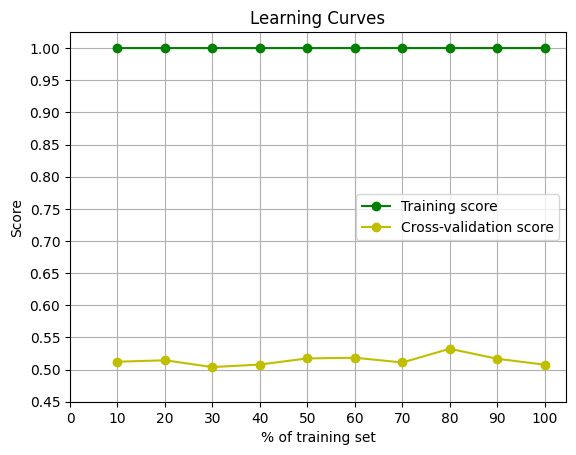

Model: AdaBoostClassifier
AUC train score = 0.76
AUC validation score = 0.58



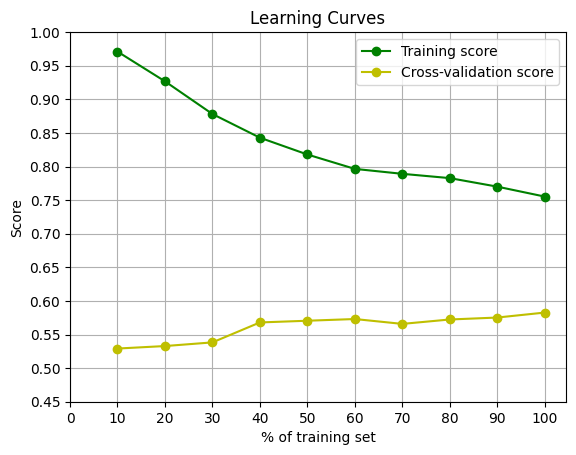

Model: GradientBoostingClassifier
AUC train score = 0.92
AUC validation score = 0.59



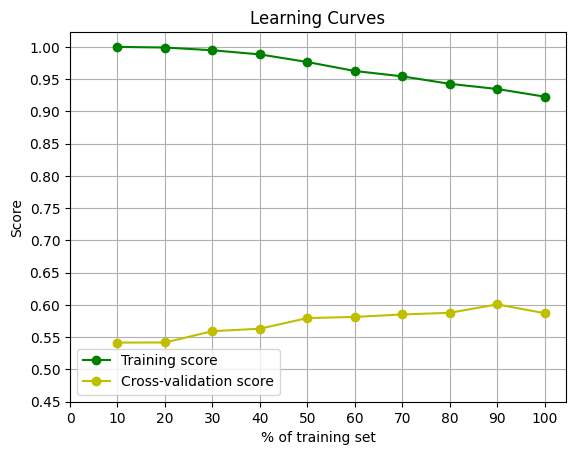

Model: XGBClassifier
AUC train score = 1.0
AUC validation score = 0.59



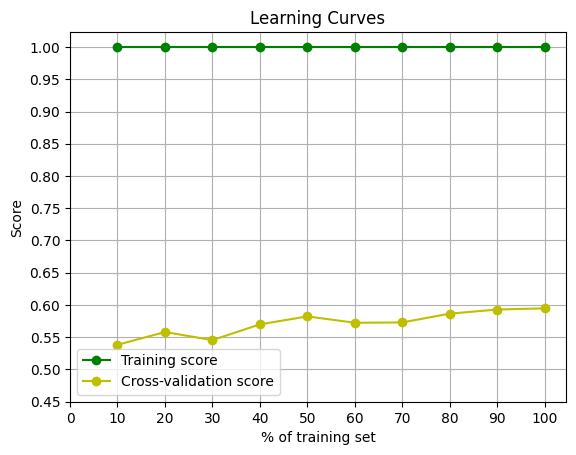

Model: LogisticRegression


c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

AUC train score = 0.69
AUC validation score = 0.61



c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


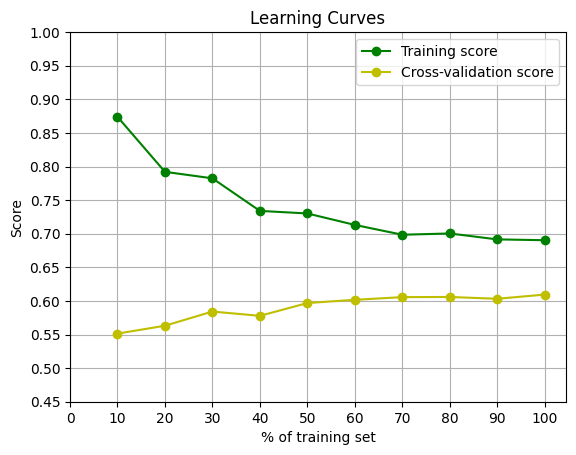

Model: KNeighborsClassifier
AUC train score = 0.98
AUC validation score = 0.49



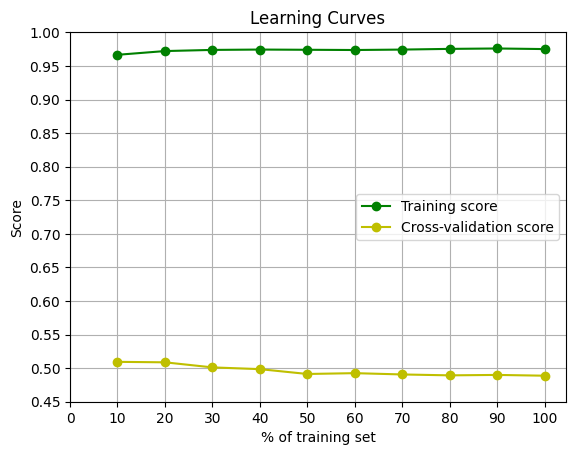

Model: SVC
AUC train score = 0.54
AUC validation score = 0.5



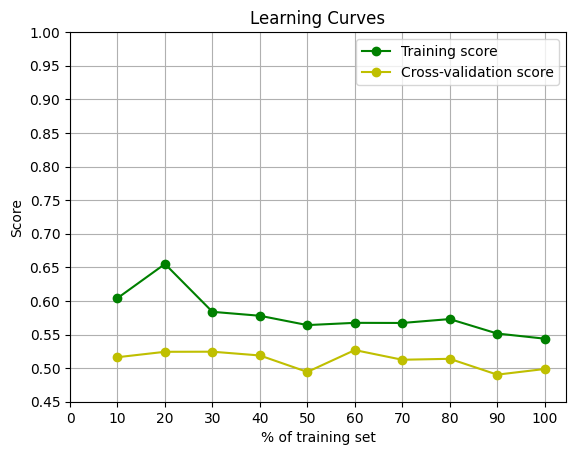

Model: DecisionTreeClassifier
AUC train score = 1.0
AUC validation score = 0.5



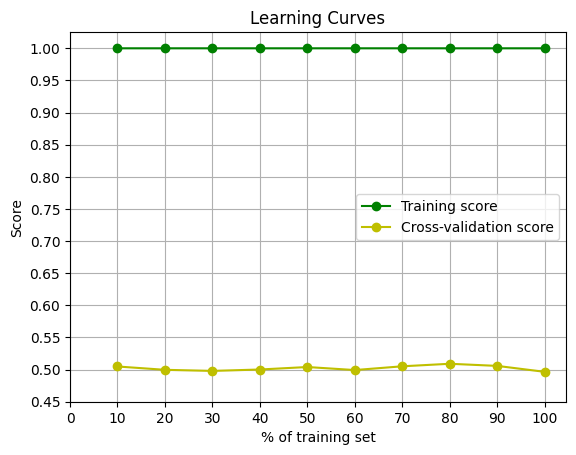

Model: GaussianNB
AUC train score = 0.64
AUC validation score = 0.54



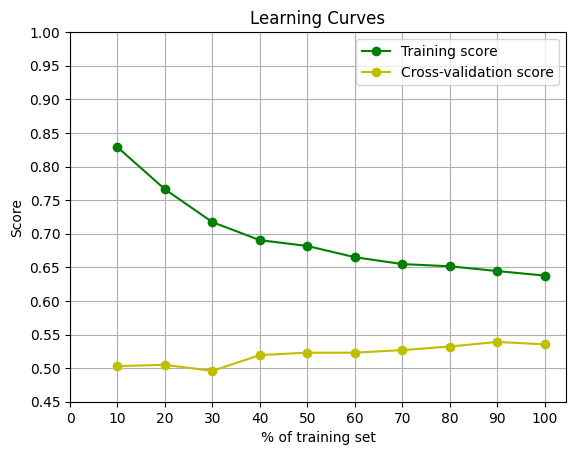

In [83]:
# Step 3: Loop through models and evaluate
for model_name, model in models.items():
    print("Model:", model_name)
    draw_learning_curves(X,y,models[model_name],10)

These results show the AUC (Area Under the ROC Curve) scores for different machine learning models on both the training and validation sets. The AUC score is a common metric used to evaluate the performance of binary classification models, where higher values indicate better performance.

Here's an interpretation of the results:

- RandomForestClassifier: Perfect AUC score of 1.0 on the training set, but low AUC score of 0.51 on the validation set. This suggests overfitting.

  AdaBoostClassifier: Moderate AUC score of 0.76 on the training set and slightly higher AUC score of 0.58 on the validation set. There might be some overfitting, but it's not as severe as RandomForest.

- GradientBoostingClassifier and XGBClassifier: Both models show high AUC scores on the training set (0.92 and 1.0 respectively), but the validation scores are slightly better than RandomForest, indicating some overfitting but better generalization capability compared to RandomForest.

- LogisticRegression: Moderate AUC score on the training set (0.69) but relatively higher AUC score on the validation set (0.61), suggesting better generalization compared to some other models.

- KNeighborsClassifier: High AUC score on the training set (0.98) but low AUC score on the validation set (0.49), indicating overfitting or poor generalization.

- SVC: Low AUC scores on both the training and validation sets, indicating poor performance or underfitting.

- DecisionTreeClassifier: Perfect AUC score of 1.0 on the training set but low AUC score of 0.5 on the validation set, suggesting severe overfitting.

- GaussianNB: Moderate AUC score on the training set (0.64) but relatively higher AUC score on the validation set (0.54), suggesting better generalization compared to some other models.

Based on these results, the LogisticRegression model seems to have the best balance between training and validation performance, with a relatively high AUC score on the validation set compared to other models. Therefore, I would recommend using the LogisticRegression model for this task. However, it's also worth considering further optimization or ensemble methods to improve performance further.

c:\Users\DESKTOP-1\anaconda3\envs\ev_2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


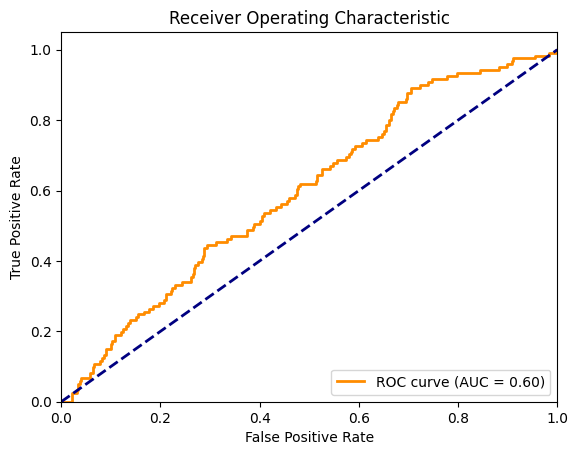

Optimal Threshold: 0.0059022569847590805


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have your training data in X_train and y_train

# Train Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict probabilities for positive class (class 1)
y_probs = logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Find optimal threshold
optimal_threshold_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_idx]

print("Optimal Threshold:", optimal_threshold)


In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty (L1 or L2 regularization)
}

# Create logistic regression model
logreg_model = LogisticRegression(max_iter=1000, solver='liblinear')

# Create GridSearchCV object with verbose output
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=50)

# Perform grid search
grid_search.fit(X, y)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get best model
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=0.001, penalty=l1.........................................
[CV 1/5; 1/6] END ..........C=0.001, penalty=l1;, score=0.539 total time=   0.5s
[CV 2/5; 1/6] START C=0.001, penalty=l1.........................................
[CV 2/5; 1/6] END ..........C=0.001, penalty=l1;, score=0.483 total time=   0.5s
[CV 3/5; 1/6] START C=0.001, penalty=l1.........................................
[CV 3/5; 1/6] END ..........C=0.001, penalty=l1;, score=0.514 total time=   0.5s
[CV 4/5; 1/6] START C=0.001, penalty=l1.........................................
[CV 4/5; 1/6] END ..........C=0.001, penalty=l1;, score=0.543 total time=   0.5s
[CV 5/5; 1/6] START C=0.001, penalty=l1.........................................
[CV 5/5; 1/6] END ..........C=0.001, penalty=l1;, score=0.479 total time=   0.6s
[CV 1/5; 2/6] START C=0.001, penalty=l2.........................................
[CV 1/5; 2/6] END ..........C=0.001, penalty=l2;,

In [94]:
# Get the best parameters found by the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}


In [95]:
import pickle

# Define the filename for saving the model
pkl_filename = "best_logistic_regression.pkl"

# Save the best logistic regression model to a file
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)


## Test df prediction

In [105]:
mailout_test = clean_testing_df(mailout_test)
mailout_test = mailout_test.dropna()

C:\Users\DESKTOP-1\AppData\Local\Temp\ipykernel_33888\1052140410.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df[common_columns_with_description]


In [109]:
best_model.predict(mailout_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Conclusion

In conclusion, honestly, this was the hardest project I've ever worked on, it took me a dedicated 42 hours (6 hours for 7 days) and I didn't even notice it. This was my first time applying PCA and do a cluster on them.

Moreover, we managed to cluster customers and population into 3 clusters with 3 PCA Components, we reached to this conclusion after dropping columns that have no <b>description</b> on them, meaning that we really don't know what they mean even after we cluster.
we found that the similar columns that need to be studied are:
- `ALTER_HH`: Main age within the household
- `LP_FAMILIE_FEIN`: Family type fine
- `PRAEGENDE_JUGENDJAHRE`: Dominating movement in the person's youth (avantgarde or mainstream)
- `ANZ_HAUSHALTE_AKTIV`: Number of households known in this building
- `LP_LEBENSPHASE_FEIN`: Lifestage fine
- `KBA13_ANZAHL_PKW`: Number of cars in the PLZ8
- `PLZ8_GBZ`: Number of buildings within the PLZ8
- `LP_LEBENSPHASE_GROB`: Lifestage rough
- `GEBURTSJAHR`: Year of birth
- `CAMEO_DEU_2015`: CAMEO_4.0: specific group

and also explore alternative classifiers beyond those already discussed. Opt for different parameters and ranges to fine-tune the model.